# DRL Assignment 01
||||
|---|---|---|
| Mohamad Aljammal | maljammal | 998134 |
| Anna Joline Lippold | alippold | 996163 |
| Pit Sinning | psinning | 996134 |


#### 1.
##### 1.1)
chess as MDP :  
for any possible valid chess board configuration (state), choose the optimal move (action) of all possible valid moves of one color of players.

state representation :  
8x8 or 64 dimentional array where 0 -> free , 1-12 different types of pieces ( 1-6 white pieces , 7-12 black pieces ) // or tuple (piece type , color)

state space (set of all States) :   
S = { all possible // valid ? // chess board configurations } 

action state (set of all actions) :   
A(s) = { all possible valid moves of all pieces of the agent assigned color in state (s) }

transition function (environment dynamics) :   
P(s', r | s , a ) = 1 // it is feasible to model the environment dynamics of chess as deterministic

Reward function :   
r(a,s) = -0.1    
r(a,moved_pieced_under_attack) = -0.5   
r(a,captured_piece) = +2      
r(a,check) = +1   
r(a,WIN-state) = +10000    
r(a,LOSS-state) = -10000    

Discounting factor :   
$\gamma$ = 0.8

Policy :    
$\Pi$(a,s) = [ probability distribution of action (a) in the set of all actions (A(s)) ]


##### 1.2 
lunar lander as MDP :    
an agent is controlling a spaceship for it's landing, by choosing the optimal adjustment on the thrust engins of the ship in a given location and momentum(speed / acceleration / rotation )

state representation :    
The state is an 8-dimensional vector: the coordinates of the lander in x & y, its linear velocities in x & y, its angle, its angular velocity, and two booleans that represent whether each leg is in contact with the ground or not.

state space (set of all States) :   
S = { all possible locations with all possible speed/acceleration, angles , angular velocities and leg states((not)in contact)} 

action state (set of all actions) :    
A(s) = {

    0: do nothing,

    1: fire left orientation engine,

    2: fire main engine,

    3: fire right orientation engine

}

transition function (environment dynamics) :   
P(s', r | s , a ) = 1

Reward function :   
r(a,leg_in_contact) = +10   
r(a,side_engine_firing) = -0.03    
r(a,main_engine_firing) = -0.3   
r(a,landing_safely) = +100   
r(a,crashing) = -100   
is increased/decreased the closer/further the lander is to the landing pad.   
is increased/decreased the slower/faster the lander is moving.   
is decreased the more the lander is tilted (angle not horizontal).    


Discounting factor :   
Lamda = 1

Policy :    
$\Pi$(a,s) = [ probability distribution of action (a) in the set of all actions (A(s)) ]

##### 1.3

* the environment dynamics are the formalization of modeling uncertainties in the environment, performing action a in a state s doesn't always lead to the same s_t+1, rather it could lead to other states due to some issues in exection or enviromental effects , and each state has achieven from (a,s) has a reward. the transition function is then a propability distribution over the set of resulting states given an action a in a state s, where the reward function in then the propability of getting a reward r given action a in state s.   
    examples : 
    1. robotic navigation, moving right could still result in moving forward with a propability x due to some software/hardware issues.
    2. satellite control in orbit, actions might be disturbed due to multiple environmental issues.

* the environment dynamics are not allways known or easy to formulate ,but I think they are/can be used in practical applications to approximate reallity better. 

### 2. & 3.) 
##### sorry for the lack of comments.

resources :  
https://www.datascienceblog.net/post/reinforcement-learning/mdps_dynamic_programming/   
https://github.com/yigitunallar/reinforcement-learning-on-simple-grid-world-game/blob/master/README.md  
https://medium.com/mlearning-ai/applying-reinforcement-learning-algorithms-to-solve-gridworld-problems-29998406dd75     
https://cs.stanford.edu/people/karpathy/reinforcejs/gridworld_dp.html   

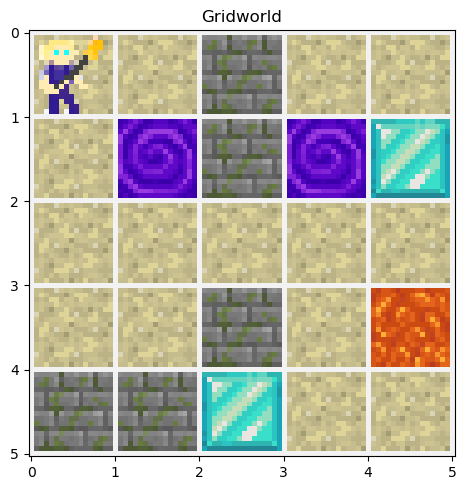

####### episodes : 50


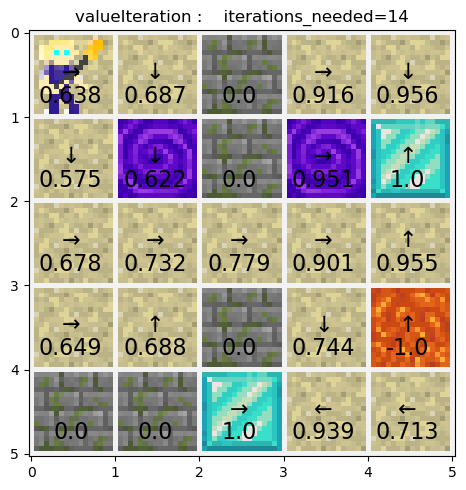

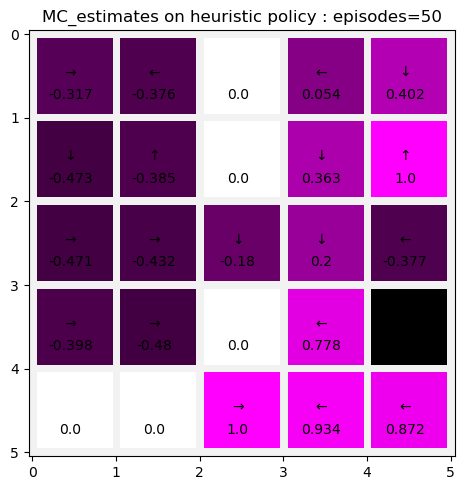

####### episodes : 200


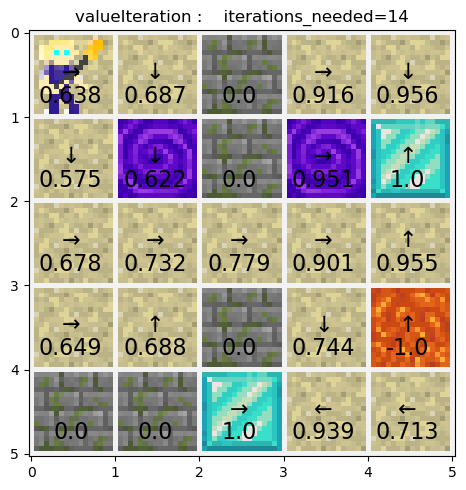

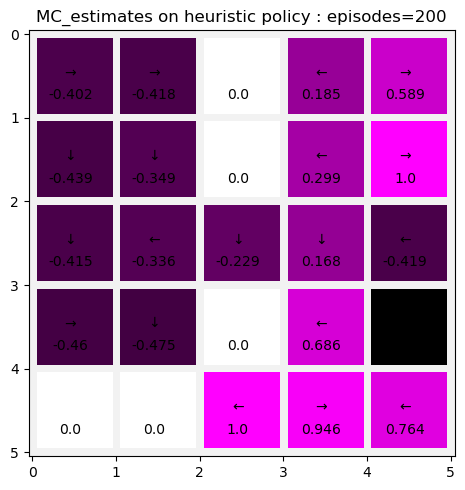

####### episodes : 500


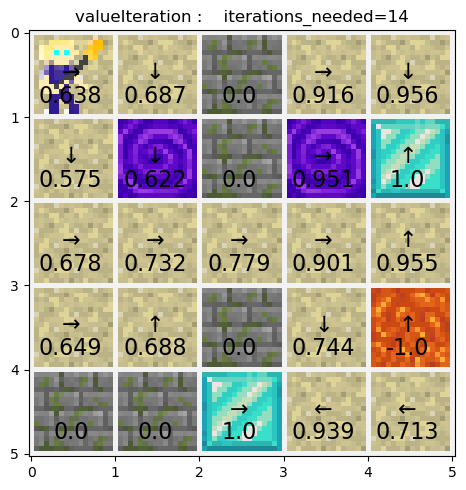

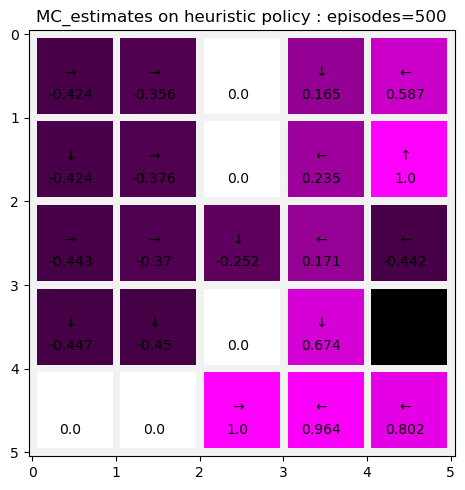

####### episodes : 1000


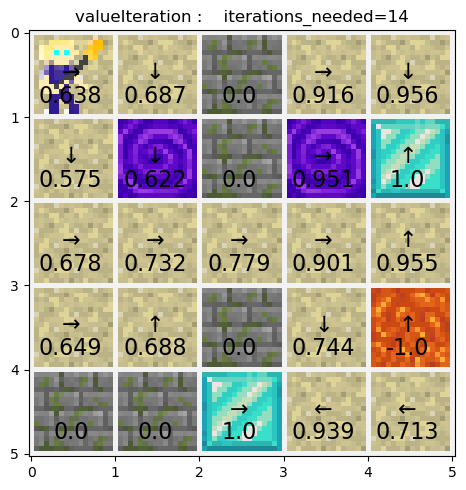

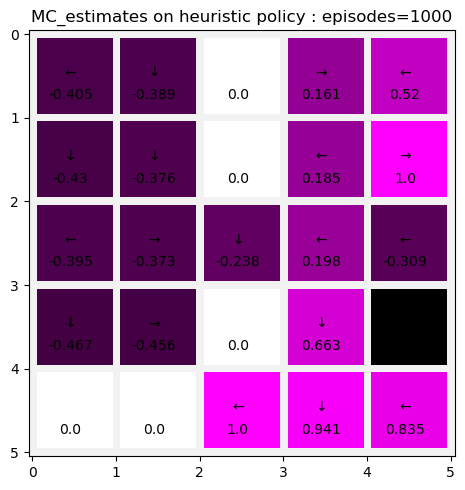

####### episodes : 10000


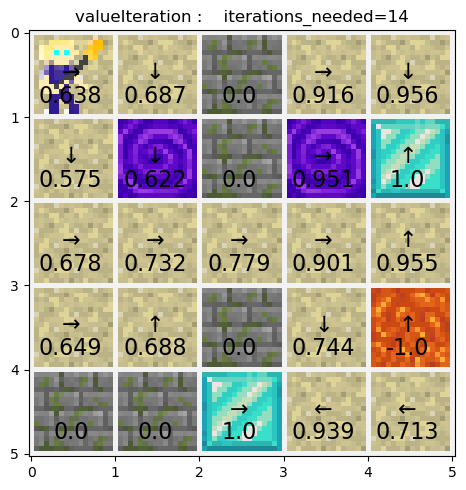

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from imageio.v2 import imread
import random
import logging
import warnings

## TODO better documentation / comments while writing the code

MAGIC = 1

# warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(lineno)d - %(levelname)s : %(message)s',
                     datefmt='%H:%M:%S')
logger = logging.getLogger('my-logger')
# logger.propagate = False
logger.disabled = True

plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

# class MDP_environment: # abstract class ??

# class State(tuple):
#     pass    

# use enums for actions, terminal and obsticals types , environment dynamics ..etc ?



## TODO? add obstacles with their costum behaivair funciton
class GridWorld: 
    '''
    a grid world class
    a state is a tuple (x,y) 
    '''
    def __init__(self,width = 5, hight = 5, startState=(0,0), terminalState={}, terrain={} ,possible_actions=[],
                setRewards={} , environmentDynamics='deterministic') -> None:
        '''
        a state is a tuple (x,y) 
        width : width of environment
        hight : hight of environment
        startState : initial state of an agent in the environment
        terminalState : dictionary of terminal-type : list of states
        terrain : dictionary of terrain-type : list of states
        '''
        self.hight = hight
        self.width = width
        #
        self.grid = np.zeros(shape=(self.hight,self.width))
        self.startState = startState # for the reseting
        self.state = startState
        self.possibleActions = possible_actions
        self.terminalStates = terminalState # dictionsry/map of terminal state types as keys and positions as values
        self.terrain = terrain # dictionsry/map of terrain types as keys and positions as values
        self.setRewards = setRewards
        # self.transitionProb = {}
        self.environmentDynamics = environmentDynamics
        self.terminated = False
        self.step = 0

        if self.environmentDynamics == 'stochastic': # later implementation for stochastic MDP
            pass

        if not self.possibleActions:
            self.possibleActions = ['L', 'U', 'R', 'D']


        ## TODO check validity of the provided states 
        # self.__configure()
    def reset(self):
        self.terminated = False
        self.state = self.startState
        self.step = 0


    def addTerminal(self, *type_value_pairs):
        for pair in  type_value_pairs:
            if pair[0] in self.terminalStates.keys():
                # if pair[1] not in self.terminalStates[pair[0]]:
                newValues = set(self.terminalStates[pair[0]] + pair[1])
                self.terminalStates[pair[0]] = list(newValues)
            else:
                self.terminalStates[pair[0]] = pair[1]

    def addTerrain(self, *type_value_pairs):
        for pair in  type_value_pairs:
            if pair[0] in self.terrain.keys():
                # if pair[1] not in self.terrain[pair[0]]:
                newValues = set(self.terrain[pair[0]] + pair[1])
                self.terrain[pair[0]] = list(newValues)
            else:
                self.terrain[pair[0]] = pair[1]
    
    def deleteObject(self, *objects_states):
        for obj_state in objects_states:
            for states in self.terminalStates.values():
                if obj_state in states:
                    states.remove(obj_state)
                    break
            for states in self.terrain.values():
                if obj_state in states:
                    states.remove(obj_state)
                    break
    
    def configuration(self,**kwargs):
        self.terminalStates = kwargs.get('terminalStates', self.terminalStates)
        self.terrain = kwargs.get('terrain', self.terrain)
        self.setRewards = kwargs.get('setRewards', self.setRewards)

    
    def getReward(self, old_state, new_state, action): # costumizable ? 
        # if agent is at terminal states
        if old_state in self.terminalStates['goal']:
            return self.setRewards.get('goal',1)
        if old_state in self.terminalStates['negative_goal']:
            return self.setRewards.get('negative_goal',-1)
        return self.setRewards.get('default',-0.02)

    def transitionProbFunc(self, old_state, new_state , action):
        for type_list in self.terminalStates.values():
            if old_state in type_list: # if agent is in terminal state no transition possible
                if old_state == new_state:
                    return 1
                return 0
        # stochastic case
        if self.environmentDynamics == 'stochastic':
            if new_state == self.lookAhead(old_state, action): # the state aligns with the action
                return 0.9
            # delta_s = self.state - state
            # x , y = self.state
            # perpendicular_states = [(x + delta_s[1], y + delta_s[0]),(x - delta_s[1], y - delta_s[0])]
            up_down = ['U','D']
            left_right = ['L','R']
            if action in up_down: # for (up,down)
                for a in left_right: # perpendicular states check 
                    if new_state == self.lookAhead(old_state, a):
                        return 0.1
            if action in left_right: # for (left,right)
                for a in up_down: # perpendicular states check
                    if new_state == self.lookAhead(old_state, a):
                        return 0.1
            # else any other state
            return 0
        # deterministic case
        elif self.environmentDynamics == 'deterministic':
            if new_state == self.lookAhead(old_state, action): # the state aligns with the action
                return 1
            return 0
        else:
            return 0

    def reachableStates(self, state, action, theta = 0.01): # TODO ? generelize 
        for type_list in self.terminalStates.values():
            if state in type_list: # if agent is in terminal state no transition possible
                    return [state]
            
        states_list = [state,
                       (state[0]+1, state[1]),(state[0]-1, state[1]),
                       (state[0], state[1]+1),(state[0], state[1]-1)]
        x , y = state
        for s in states_list.copy():
            if s in self.terrain.get('shortcut',[]): # handel shortcut terrain
                states_list.append(( 2*s[0] - x , 2*s[1] -y ))
        
        for s in states_list.copy():
            # if not self.isValidState(s) or self.transitionProbFunc(state,s,action) > theta:
            if not self.isValidState(s) or s in self.terrain.get('shortcut',[]):
                states_list.remove(s)

        return states_list

    def isAtTerminal(self):
        if self.state in [s for valueList in self.terminalStates.values() for s in valueList]:
            self.terminated = True
            return True
        return False

    def isTerminal(self, state):
        if state in [s for valueList in self.terminalStates.values() for s in valueList]:
            return True
        return False
    
    def nextState(self, action): # TODO ? check if action is in possible action
        nextState = self.state
        if action == "L":
            nextState = (self.state[0], self.state[1] - 1)
        elif action == "U":
            nextState = (self.state[0] - 1, self.state[1])
        elif action == "R":
            nextState = (self.state[0], self.state[1] + 1)
        elif action == "D":
            nextState = (self.state[0] + 1, self.state[1])
        # check for grid's boarders and objects that block the path (walls)
        if self.isValidState(nextState):
            # consider terrain dynamics
            if nextState in self.terrain.get('shortcut' , []):
                nextState = (2*nextState[0]-self.state[0] , 2*nextState[1]-self.state[1])
                if not self.isValidState(nextState):
                    nextState = self.state

            return nextState
        return self.state
    
    def lookAhead(self, state , action):
        current_state = self.state
        self.state = state
        next = self.nextState(action)
        self.state = current_state
        return next
        

    def updateAgentState(self, state): ## TODO save previous values
        self.grid[self.state] = 0
        self.state = state
        self.grid[self.state] = 1
        self.step += 1

    def isValidState(self, state):
        return self.isInGrid(state) and self.isFree(state)
    
    def isInGrid(self, state):
        return (state[0] >= 0) and (state[0] <= (self.hight -1)) and (state[1] >= 0) and (state[1] <= (self.width -1))
    
    def isFree(self, state):
        return state not in self.terrain.get('wall', [])
        
    

    def showGrid(self, style = 'image' , size= 10 , state_values={}, policy={}, prob_policy={},
                  images=None, title:str='Gridworld', **kwargs):  
        '''
        with the image mode it's possible to distrain images or pixel art for objects in the environment
        '''

        def showResults(axis):
            if state_values:
                symbols = {}
                x_offset = state_values.get('y_offset', 0.5)
                y_offset = state_values.get('y_offset', 0.8)
                for key , value in state_values.items(): 
                    text_kwargs = dict(ha='center', va='center', fontsize=size, color='black')
                    text = ax.text(key[1]*(size + 1) + (size * x_offset),
                                    key[0]*(size + 1) + (size * y_offset),
                                    symbols.get(value , value) , text_kwargs)

            if policy:
                symbols = {'L':'←','U':'↑','R':'→', 'D':'↓'}
                x_offset = policy.get('y_offset', 0.5)
                y_offset = policy.get('y_offset', 0.5)
                for key , value in policy.items(): 
                    text_kwargs = dict(ha='center', va='center', fontsize=size, color='black')
                    text = ax.text(key[1]*(size + 1) + (size * x_offset),
                                   key[0]*(size + 1) + (size * y_offset),
                                   symbols.get(value , value) , text_kwargs)
            if prob_policy:
                symbols = {'L':'←','U':'↑','R':'→', 'D':'↓'}
                x_offset = policy.get('y_offset', 0.5)
                y_offset = policy.get('y_offset', 0.5)
                for state , possible_actions in prob_policy.items():
                    action_list = list(possible_actions.keys())
                    prob_list = list(possible_actions.values())
                    # action = action_list[prob_list.index(max(prob_list))]
                    prob_list = np.asarray(prob_list).astype('float64')
                    prob_list = prob_list / np.sum(prob_list)  # normilizing the probabilities
                    if self.isTerminal(state):
                        action = np.random.choice(action_list)
                    else:
                        action = np.random.choice(action_list, p=prob_list)
                    text_kwargs = dict(ha='center', va='center', fontsize=size, color='black')
                    text = ax.text(state[1]*(size + 1) + (size * x_offset),
                                   state[0]*(size + 1) + (size * y_offset),
                                   symbols.get(action , action) , text_kwargs)
                    
    
        if style == 'color map':
            
            world_img = np.ones(shape=(self.hight * (size+1) +1, self.width * (size+1) +1, 3), dtype='float')
            world_img[0::size +1,:,:3] = 0.95 # the +1 for the seperatins
            world_img[:,0::size+1,:3] = 0.95

            if state_values:
                v_max = max([v**2 for v in state_values.values()])
                v_min = min(state_values.values())

                for state , value in state_values.items():
                    if self.isValidState(state):
                        x = state[0]*(size +1)+1
                        y = state[1]*(size +1)+1

                        v_scaled = (value - v_min) / (v_max - v_min)
                        world_img[x:x+size,y:y+size,:] = (v_scaled,0,v_scaled)

            fig , ax = plt.subplots(1,1) 
            ax.imshow(world_img)

            ax.xaxis.set_major_locator(ticker.MultipleLocator(size+1))
            ax.yaxis.set_major_locator(ticker.MultipleLocator(size+1))
            xlabels = ax.get_xticklabels()
            ylabels = ax.get_yticklabels()
            ax.set_xticklabels([int(i.get_position()[0] / (size+1)) for i in xlabels]) 
            ax.set_yticklabels([int(i.get_position()[1] / (size+1)) for i in ylabels]) 
            # ax.grid(axis='both', color='0.95')
            ax.set_title(title)

            showResults(ax)

            plt.show()

        if style =='image' :
            render_image = False
            if isinstance(images, dict) and images:
                images_Size = images.get('size', 0)
                if images_Size > 0 and images_Size < 100:
                    size = images_Size
                    render_image = True

            def colorState(arr , state , fill = 'black'):
                colors = {'black' : (0,0,0,1),
                          'white' : (1,1,1,1),
                          'grey' : (0.2,0.2,0.2,1),
                          'red' : (1,0,0,1),
                          'green' : (0,1,0,1),
                          'blue' : (0,0,1,1),
                          'yellow' : (1,1,0,1),}
                
                x = state[0]*(size +1)+1
                y = state[1]*(size +1)+1
                if isinstance(fill,np.ndarray):
                    arr[x:x+size,y:y+size,:] = fill
                else:
                    arr[x:x+size,y:y+size,:] = colors.get(fill, (0,0,0,1))

            world_img = np.ones(shape=(self.hight * (size+1) +1, self.width * (size+1) +1, 4), dtype='float') # + (hight + 1 and width + 1 ) to count for seperatins
            world_img[0::size +1,:,:3] = 0.95 # the +1 for the seperatins
            world_img[:,0::size+1,:3] = 0.95
            
            for x , y in np.ndindex(self.grid.shape):
                state = (x,y)
                if state == self.state :
                    if render_image:
                        colorState(world_img, (x,y), fill=images.get('agent' , 'blue'))
                    else:
                        colorState(world_img, (x,y), fill='blue')
                elif state in self.terminalStates.get('goal',[]):
                    if render_image:
                        colorState(world_img, (x,y), fill=images.get('goal' , 'green'))
                    else:
                        colorState(world_img, (x,y), fill='green')
                elif state in self.terminalStates.get('negative_goal',[]):
                    if render_image:
                        colorState(world_img, (x,y), fill=images.get('negative_goal' , 'red'))
                    else:
                        colorState(world_img, (x,y), fill='red')
                elif state in self.terrain.get('wall',[]):
                    if render_image:
                        colorState(world_img, (x,y), fill=images.get('wall' , 'grey'))
                    else:
                        colorState(world_img, (x,y), fill='grey')
                elif state in self.terrain.get('shortcut',[]):
                    if render_image:
                        colorState(world_img, (x,y), fill=images.get('shortcut' , 'yellow'))
                    else:
                        colorState(world_img, (x,y), fill='yellow')
                else:
                    if render_image:
                        colorState(world_img, (x,y), fill=images.get('default' , 'white'))
                    else:
                        colorState(world_img, (x,y), fill='white')


            ### TODO : fix the axis(tiles) , step = size + 1
            fig , ax = plt.subplots(1,1) 
            ax.imshow(world_img)

            ax.xaxis.set_major_locator(ticker.MultipleLocator(size+1))
            ax.yaxis.set_major_locator(ticker.MultipleLocator(size+1))
            xlabels = ax.get_xticklabels()
            ylabels = ax.get_yticklabels()
            ax.set_xticklabels([int(i.get_position()[0] / (size+1)) for i in xlabels]) 
            ax.set_yticklabels([int(i.get_position()[1] / (size+1)) for i in ylabels]) 
            # ax.grid(axis='both', color='0.95')
            ax.set_title(title)

            showResults(ax)

            plt.show()

        if style == 'ascii' :
            for i in range(0, self.hight):
                print('-'* 4 * self.width )
                out = '| '
                for j in range(0, self.width):
                    if self.grid[i, j] == 1:
                        token = '*'
                    if self.grid[i, j] == 2:
                        token = '#'
                    if self.grid[i, j] == 0:
                        token = '0'
                    out += token + ' | '
                print(out)
            print('-'* 4 * self.width )

# TODO? : in policy , assign action only to free(walkable) places
class Agent: 
    '''
    agent class
    '''
    def __init__(self, environment = GridWorld(), actions = []) -> None:
        self.states = []
        self.actions = ['L', 'U', 'R', 'D']
        if actions:
            self.actions = actions
        self.stateValueFunc = {} # TODO , change state value function to arrays
        self.actionValueFunc = {} # one item is ( (state,action) , value ) exp. ( (2,2),'U') , 0.6 )
        self.policy = {}
        
        for x,y in np.ndindex(environment.grid.shape):
            self.stateValueFunc[(x,y)] = 0


    def __updatePolicy(self, environment:GridWorld):
        for x,y in np.ndindex(environment.grid.shape):
            state = x,y
            if environment.isValidState(state):
                self.policy[(x,y)] = self.argMaxAction(environment,(x,y))
            else:
                self.policy[(x,y)] = None

    def policyGenerator(self,environment:GridWorld, explorationRate=0.2):
        new_policy = {}
        for x,y in np.ndindex(environment.grid.shape):
            if environment.isValidState((x,y)):
                action_count = len(self.actions) if len(self.actions) != 0 else 1
                equal_prob = 1 / action_count
                goal = environment.terminalStates.get('goal' , [(x,y)])
                x_distance = x - goal[0][0]
                y_distance = y - goal[0][1]
                one_direction_prob = round(1 - explorationRate + (explorationRate / action_count) , 2)
                tow_direction_prob = round( (1 - explorationRate)/2 + (explorationRate / action_count) , 2)
                non_target_prob = round(explorationRate / action_count , 2)

                if x_distance == 0 and y_distance == 0: # y and x distan is 0
                        new_policy[(x,y)] = {a : 0 for a in self.actions}
                elif x_distance == 0:
                    if y_distance < 0:
                        new_policy[(x,y)] = {a : \
                                        (one_direction_prob  if a == 'R' else non_target_prob)\
                                            for a in self.actions}
                    else:
                        new_policy[(x,y)] = {a : \
                                        (one_direction_prob  if a == 'L' else non_target_prob)\
                                            for a in self.actions}
                elif y_distance == 0:
                    if x_distance < 0:
                        new_policy[(x,y)] = {a : \
                                        (one_direction_prob  if a == 'D' else non_target_prob)\
                                            for a in self.actions}
                    else:
                        new_policy[(x,y)] = {a : \
                                            (one_direction_prob  if a == 'U' else non_target_prob)\
                                            for a in self.actions}
                        

                randomize_check = np.random.choice(4,size=4,replace=False)
                for i in randomize_check:                
                    if x_distance < 0 and y_distance < 0 and i == 0:
                        new_policy[(x,y)] = {a : \
                                                (tow_direction_prob  if a == 'D' or a == 'R' else non_target_prob)\
                                                for a in self.actions}
                    if x_distance < 0 and y_distance > 0 and i == 1:
                        new_policy[(x,y)] = {a : \
                                                (tow_direction_prob  if a == 'D' or a == 'L' else non_target_prob)\
                                                for a in self.actions}
                    if x_distance > 0 and y_distance > 0 and i == 2:
                        new_policy[(x,y)] = {a : \
                                                (tow_direction_prob  if a == 'U' or a == 'L' else non_target_prob)\
                                                for a in self.actions}
                    if x_distance > 0 and y_distance < 0 and i == 3:
                        new_policy[(x,y)] = {a : \
                                                (tow_direction_prob  if a == 'U' or a == 'R' else non_target_prob)\
                                                for a in self.actions}
                
        return new_policy

    def prob_to_determin_policy(self,environment:GridWorld, policy):
        deterministic_policy = {}
        action_list = list(list(policy.values())[0].keys())
        for state , possible_actions in policy.items():
            prob_actions = np.asarray([possible_actions[action_list[i]] for i in range(len(action_list))]).astype('float64')
            prob_actions = prob_actions / np.sum(prob_actions)  # normilizing the probabilities
            if environment.isTerminal(state):
                action = np.random.choice(action_list)
            else:
                action = np.random.choice(self.actions, p=prob_actions)
            deterministic_policy[state] = action

        return deterministic_policy

    def argMaxAction(self,environment:GridWorld, state): 
        rest_of_actions = self.actions.copy()
        for action in self.actions:
            if environment.lookAhead(state, action) == state:
                rest_of_actions.remove(action)

        if len(rest_of_actions) == 0:
            logging.info('no action found for Agent::argMaxAction')
            return None
        elif len(rest_of_actions) == 1:
            return rest_of_actions[0]  
        else:
            action = np.random.choice(rest_of_actions)  
            rest_of_actions.remove(action)
            mx_nxt_reward =  self.stateValueFunc[environment.lookAhead(state, action)]
            for a in rest_of_actions:
                nxt_reward = self.stateValueFunc[environment.lookAhead(state, a)]
                if nxt_reward >= mx_nxt_reward:
                    action = a
                    mx_nxt_reward = nxt_reward
            return action
    
    def takeAction(self, environment:GridWorld, action):
        position = environment.nextState(action)
        environment.updateAgentState(position)
        return environment.state

    def reset(self,environment:GridWorld):
        self.states = [environment.state]
        self.policy = {}
        self.stateValueFunc = {}
        for x,y in np.ndindex(environment.grid.shape):
            self.stateValueFunc[(x,y)] = 0
        environment.reset()
    
    def getConvergedStates(self, sv_old, sv_new , theta = 0.001):
        diff = abs(sv_old-sv_new)
        return np.where(diff < theta)[0]
    
    def getActionProb(self, state, action): # TODO need completion for stochastic policies
        return 1

    def mc_estimatesOfState(self, environment:GridWorld, policy=None, samples=1000 , max_steps=20):
        if policy == None:
            if self.policy:
                policy = self.policy
            else:
                print('agent has no policy for the MC-estimates')
                return 0
        starting_state = environment.state
        sum_rewards = 0
        i = 0
        while i < samples:
            i += 1
            steps = 0
            value_i = 0
            while steps < max_steps:
                steps += 1
                state = environment.state
                action_l = self.actions.copy()

                if environment.isAtTerminal():
                    action = np.random.choice(self.actions)
                else:
                    prob_actions = np.asarray([policy[state][action_l[i]] for i in range(len(self.actions))]).astype('float64')
                    prob_actions = prob_actions / np.sum(prob_actions)  # normilizing the probabilities
                    action = np.random.choice(self.actions, p=prob_actions)

                possible_states = environment.reachableStates(state, action)
                prob_states = np.asarray([environment.transitionProbFunc(state, new_s, action) for new_s in possible_states]).astype('float64')
                prob_states = prob_states / np.sum(prob_states) # normilizing the probabilities
                new_state_index = np.random.choice(len(possible_states), p=prob_states)
                new_state = possible_states[new_state_index]

                trans_prob = prob_states[new_state_index]
                trans_prob = 1
                value_i += (trans_prob * environment.getReward(state, new_state, action))
                if environment.terminated:
                    environment.terminated = False
                    break
                # if not in a terminal state -> take step
                self.takeAction(environment, action)
            sum_rewards += value_i
            environment.updateAgentState(starting_state)

        value = sum_rewards / samples
        return round(value, 3)
    
    def evaluateValueOfSatate(self, environment:GridWorld, sv_old, gamma):
        value = 0
        expectedRewards = [-np.inf] * len(self.actions)

        for index , action in enumerate(self.actions):
            actionProb = self.getActionProb(environment.state, action) # for compatibility with other algorithems
            if actionProb == 0 or action == None:
                continue

            possible_states = environment.reachableStates(environment.state, action)
            expectedReward = 0
            terminal_marker = 1
            for state in possible_states:
                if len(possible_states) == 1:
                    terminal_marker = 0
                value_state = sv_old[state]
                state_expectedReward = environment.transitionProbFunc(environment.state, state, action) *\
                                        (environment.getReward(environment.state, state, action) +\
                                        gamma * value_state * terminal_marker)
                expectedReward += state_expectedReward
            expectedRewards[index] = expectedReward

            value_action = actionProb * expectedReward
            value += value_action
        
        if len(self.policy) == 0:
            value = max(expectedRewards)
        return round(value, 3)


    def updateStateValueFunc(self, environment:GridWorld, sv_old=np.array([None]), gamma=0.9, convergedStates=[] , ignore=0.5, evaluationMethod='DP', **kwargs):
        sv_func = np.zeros(shape=environment.grid.shape)
        prev_state = environment.state

        if sv_old.all() == None and evaluationMethod == 'DP':
            sv_old = self.stateValueFunc

        for x,y in np.ndindex(environment.grid.shape):
            state = (x,y)
            if ignore >= np.random.uniform(0,1):
                if state in convergedStates:
                    sv_func[state] = sv_old[state]
                    continue
            if environment.isValidState(state): # evaluate value of valid state (can be entered) 
                environment.updateAgentState(state)
                if evaluationMethod == 'DP':
                    sv_func[state] = self.evaluateValueOfSatate(environment, sv_old, gamma)
                elif evaluationMethod == 'MC':
                    sv_func[state] = self.mc_estimatesOfState(environment, policy=kwargs.get('policy', self.policy),
                                                              samples=kwargs.get('samples', None), max_steps=kwargs.get('max_steps', None))
                else:
                    raise ValueError('evaluation method not implemented , choose from ( "DP" , "MC" )')
        environment.updateAgentState(prev_state)

        for state, value in np.ndenumerate(sv_func):
            self.stateValueFunc[state] = value
        return sv_func


    def valueIteration(self,environment:GridWorld , max_iterations=np.inf, gamma = 1, theta = 0.01):
        self.reset(environment) # ensure policy is empty, for compatibility with other algorithems
        sv_old = None
        sv_new = np.zeros(shape=environment.grid.shape)
        convergedStates = np.zeros(0)
        iteratoin = 0
        while len(convergedStates) < environment.grid.size and iteratoin < max_iterations:
            sv_old = sv_new
            sv_new = self.updateStateValueFunc(environment, sv_old, gamma, convergedStates )
            convergedStates = self.getConvergedStates(sv_old, sv_new, theta)
            iteratoin += 1

        for state, value in np.ndenumerate(sv_new):
            self.stateValueFunc[state] = value

        self.__updatePolicy(environment)
        environment.reset()
        
        return sv_new , iteratoin

    def showResults(self,environment:GridWorld, style='array' ,results='policy', policy_probabilistc=False,**kwargs):
        ''' showing the results of after training , either policy or values function.'''
        results_dict = None
        if results == 'both':
            if policy_probabilistc:
                environment.showGrid(style=style, size=kwargs.get('size' , None),
                                    images=kwargs.get('images', None), state_values=self.stateValueFunc,
                                    prob_policy=self.policy, title=kwargs.get('title', None))
            else:
                environment.showGrid(style=style, size=kwargs.get('size' , None),
                                        images=kwargs.get('images', None), state_values=self.stateValueFunc,
                                        policy=self.policy, title=kwargs.get('title', None))
            
        elif results == 'policy':
            results_dict = self.policy
        elif results == 'state values':
            results_dict = self.stateValueFunc
        else:
            print('no valid results type was given , pick from : ("policy","state values")')
            return
        
        if style == 'array':
            values = np.zeros(shape=(environment.grid.shape))
            for s , v in results_dict.items():
                values[s[0],s[1]] = v
            
            print(values)

        elif style == 'image' :
            if results == 'policy':
                environment.showGrid(style=style, size=kwargs.get('size' , None),
                                        images=kwargs.get('images', None), policy=results_dict, title=kwargs.get('title', None))
            elif results == 'state values':
                environment.showGrid(style=style, size=kwargs.get('size' , None),
                                        images=kwargs.get('images', None), state_values=results_dict, title=kwargs.get('title', None))
        elif style == 'color map':
            if results == 'state values':
                environment.showGrid(style=style, size=kwargs.get('size' , None),
                                        images=kwargs.get('images', None), state_values=results_dict, title=kwargs.get('title', None))
            elif results == 'poliy':
                environment.showGrid(style=style, size=kwargs.get('size' , None),
                                        images=kwargs.get('images', None), policy=results_dict, title=kwargs.get('title', None))
        

        elif style == 'ascii':
            pass
        else:
            print('## results  : ' ,results_dict)
            print('no valid style given, options ( "image" , "color map" , "array" )')
        

def normalize_img(image, size=16):
    x , y = image.shape[:2]
    return image[::int(x/size),::int(y/size),:] /255  # downscale and normelize values 

def get_texture(x,y ,textures , size):
    return textures[x*size:(x+1)*size,y*size:(y+1)*size,:]

def init_rendering_resources(configuration=0):
    texture_map = {}
    if configuration == 0:
        scaler = 16 # normalized img size
        img = imread('images/rechts.png')
        textures = imread('images/Textures-16.png')
        # pick downscaled and normalized images
        agent_img = normalize_img(img,scaler) 
        wall_img = normalize_img(get_texture(4,3,textures, scaler), scaler)
        shortcut_img = normalize_img(get_texture(10,12,textures, scaler), scaler)
        goal_img = normalize_img(get_texture(11,4,textures, scaler), scaler)
        negative_goal_img = normalize_img(get_texture(9,11,textures, scaler), scaler)
        default_img = normalize_img(get_texture(6,1,textures, scaler), scaler)

        agent_img[agent_img == 0] = default_img[agent_img == 0] 
        # object type -> image mapping, size is n of all the nxn images 
        texture_map = {'size': 16,'agent': agent_img,'wall': wall_img , 'shortcut': shortcut_img,
                'goal': goal_img, 'negative_goal': negative_goal_img,'default': default_img}
        # plt.imshow(wall_img)
    else:
        print('pick valid configuration, available : [0,]')

    return texture_map

# ------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------

if __name__ == "__main__":
    
    # variables for training , scale for ploting and an episodes list
    scale = 10
    episodes = [50,200,500,1000,10000]
    textures_map = init_rendering_resources(configuration=0)


    # simple grid
    world = GridWorld(5,5 ,
            terminalState={'goal': [(1,4)],
                        'negative_goal': [(3,4)]},
            terrain={'wall': [(0,2),(1,2),(3,2)]},
            setRewards= {'default': -0.02},
            environmentDynamics='stochastic')
    # world.showGrid(style='image' , images=img_map)

    # creating an agent in the gridworld
    agent = Agent(environment=world)

    # adding more complexity to the grid (terrains and goals)
    world.addTerminal(('goal',[(4,2)]))
    world.addTerrain(('wall',[(4,0),(4,1)]),('shortcut', [(1,1),(1,3)]))
    # world.deleteObject((4,0),(4,2))
    world.showGrid(style='image' , images=textures_map)
    
    # trainig in the more complex grid
    for x in episodes:
        print(f'####### episodes : {x}' )
        if x in episodes[:2]:
            _ , iterations = agent.valueIteration(world, max_iterations=x, gamma=0.9) 
            agent.showResults(world, style='image',results='both' ,size=scale, images=textures_map,
                            title=f'valueIteration :    iterations_needed={iterations}')
        if x in episodes[:]:
            agent.policy = agent.policyGenerator(world)
            agent.updateStateValueFunc(world, evaluationMethod='MC', policy=agent.policy, samples=x , max_steps = 25)
            # agent.policy = agent.prob_to_determin_policy(world, agent.policy)
            agent.showResults(world, style='color map',results='both', policy_probabilistc=True, size=scale, images=textures_map,
                            title=f'MC_estimates on heuristic policy : episodes={x}')

## TODO seperate rendering into own class, (in general more classes / independent functoins)

